# Medición de la eficacia de las medidas profilácticas aplicadas ante la epidemia de influenza A/H1N1 en México durante la primavera del 2009

- [Jorge Esteban Mendoza Ortiz](mailto:esteban.mendoza@ciencias.unam.mx) (418002863)

- [Enrique Moctezuma González](mailto:enriquemg@ciencias.unam.mx) (315019344)

- [Ana Victoria López Rodríguez](mailto:anaviclopez@ciencias.unam.mx) (314614300) 

### 1. Librerías y carga de datos

In [1]:
suppressMessages(require(tidyverse))
suppressMessages(require(lubridate))

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
data = read.csv("infectados.csv", stringsAsFactors = FALSE) %>%
    mutate(fecha = dmy(fecha))

### 4. Propuesta de $S_0$

In [ ]:
d05 = dmy("29-08-2005")
d09 = dmy("27-03-2009")
d10 = dmy("25-06-2010")

p05 = 103263388
p10 = 112336538

r = 100 * ( (p10 / p05)^(1 / as.integer(d10 - d05)) - 1 )
S_0 = p05 * (1 + r/100)^(as.integer(d09 - d05))

In [12]:
S_0 = 109918558
print(S_0)

[1] 109918558


### 2. Subestimación de $\beta_0$ e $I_0$

In [3]:
I = filter(data, fecha <= dmy("26-04-2009"))[,"I"]
t = 0:(length(I)-1)
Y = log(I)

model = lm(Y ~ t)

C = coef(model)

I_0 = exp(unname(C[1]))
beta_0 = unname(C[2])

Función hipótesis $h(t) = I_0 \exp(\beta_0 t)$

In [5]:
h = function(t) {
    return(I_0 * exp(beta_0 * t))
}

### 3. Estimación de $\beta_0$ e $I_0$

Función de costo:

In [7]:
J_0 = function() {
    return(mean((I - h(t))^2)/2)
}

Funciones de cálculo de gradiente en parámetros actuales:

In [8]:
JI_0 = function() {
    return(mean((I - h(t))*(-exp(beta_0*t))))
}

Jbeta_0 = function() {
    return(mean((I - h(t))*(-I_0*t*exp(beta_0*t))))
}

Iteraciones de descenso de gradiente:

In [9]:
iters = 201000
alpha = 0.0000001

# Historiales de I_0, beta_0 y costo
cost_0 = c(J_0())

tempI_0 = c(I_0)
tempBeta_0 = c(beta_0)

# Iteraciones
for (i in 2:iters) {
    tempI_0 = c(tempI_0, I_0 - alpha*JI_0())
    tempBeta_0 = c(tempBeta_0, beta_0 - alpha*Jbeta_0())
    
    I_0 = tempI_0[i]
    beta_0 = tempBeta_0[i]
    
    cost_0 = c(cost_0, J_0())
}

# Elección de parámetros que generan el menor costo
I_0 = tempI_0[which.min(cost_0)]
beta_0 = tempBeta_0[which.min(cost_0)]

Visualización de función hipótesis $h$ con parámetros que generan menor costo.

[1] 0.2173231 0.2516953


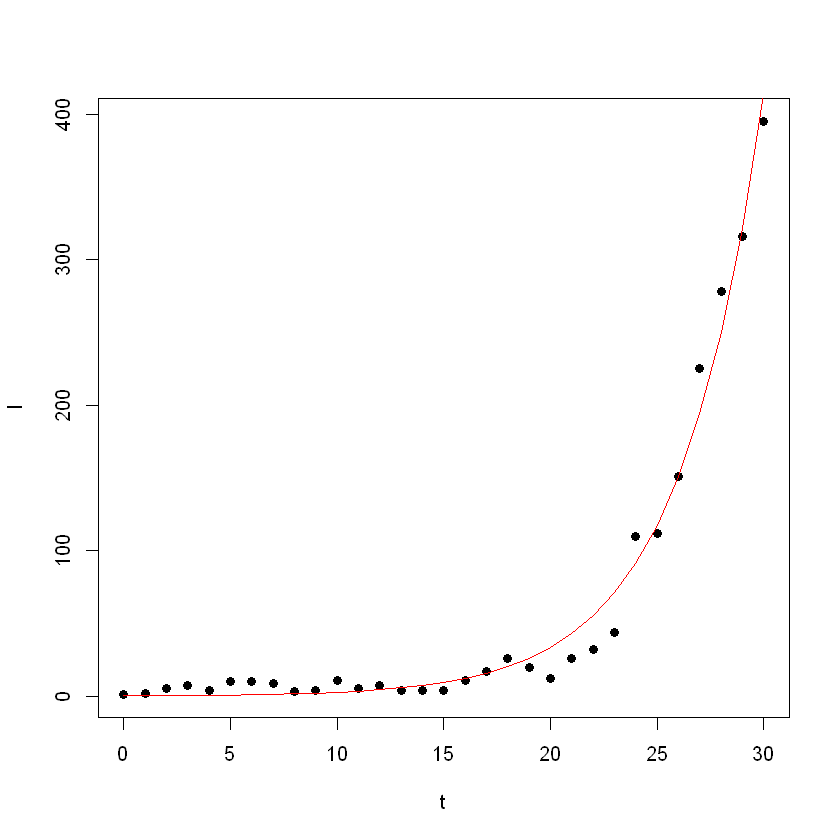

In [10]:
# I_0 = 0.2173231; beta_0 = 0.2516953
print(c(I_0, beta_0)) 

plot(t, I, pch=19)
lines(t, h(t), col="red")

### 5. Estimación de $\mu$, $\kappa_0$ y $R_0$

In [13]:
mu = 1 / 3

kappa_0 = (beta_0 + mu) / S_0 
R_0 = beta_0 / mu + 1

In [16]:
kappa_0 = 5.322383e-09; R_0 = 1.755086e+00
print(c(kappa_0, R_0))

[1] 5.322383e-09 1.755086e+00


### 6. Subestimación de $\beta_1$ e $I_1$

In [18]:
I_ = filter(data, dmy("27-04-2009") <= fecha, fecha <= dmy("14-05-2009"))[,"I"]
t_ = 0:(length(I_)-1)
Y_ = log(I_)

model_ = lm(Y_ ~ t_)

C_ = coef(model_)

I_1 = exp(unname(C_[1]))
beta_1 = unname(C_[2])

Función hipótesis $g(t) = I_1 \exp(\beta_1 t)$

In [19]:
g = function(t) {
    return(I_1 * exp(beta_1 * t))
}

### 7. Estimación de $\beta_1$ e $I_1$

Función de costo:

In [20]:
J_1 = function() {
    return(mean((I_ - g(t_))^2)/2)
}

Funciones de cálculo de gradiente en parámetros actuales:

In [21]:
JI_1 = function() {
    return(mean((I_ - g(t_))*(-exp(beta_1*t_))))
}

Jbeta_1 = function() {
    return(mean((I_ - g(t_))*(-I_1*t_*exp(beta_1*t_))))
}

Iteraciones de descenso de gradiente:

In [ ]:
iters = 3e5
alpha_ = 0.0000001

# Historiales de I_1, beta_1 y costo
cost_1 = c(J_1())

tempI_1 = c(I_1)
tempBeta_1 = c(beta_1)

# Iteraciones
for (i in 2:iters) {
    tempI_1 = c(tempI_1, I_1 - alpha_*JI_1())
    tempBeta_1 = c(tempBeta_1, beta_1 - alpha_*Jbeta_1())
    
    I_1 = tempI_1[i]
    beta_1 = tempBeta_1[i]
    
    cost_1 = c(cost_1, J_1())
}

# Elección de iteraciones de menor costo
I_1 = tempI_1[which.min(cost_1)]
beta_1 = tempBeta_1[which.min(cost_1)]

Visualización de función hipótesis $g$ con parámetros que generan menor costo.

[1] 321.81661488  -0.06198531


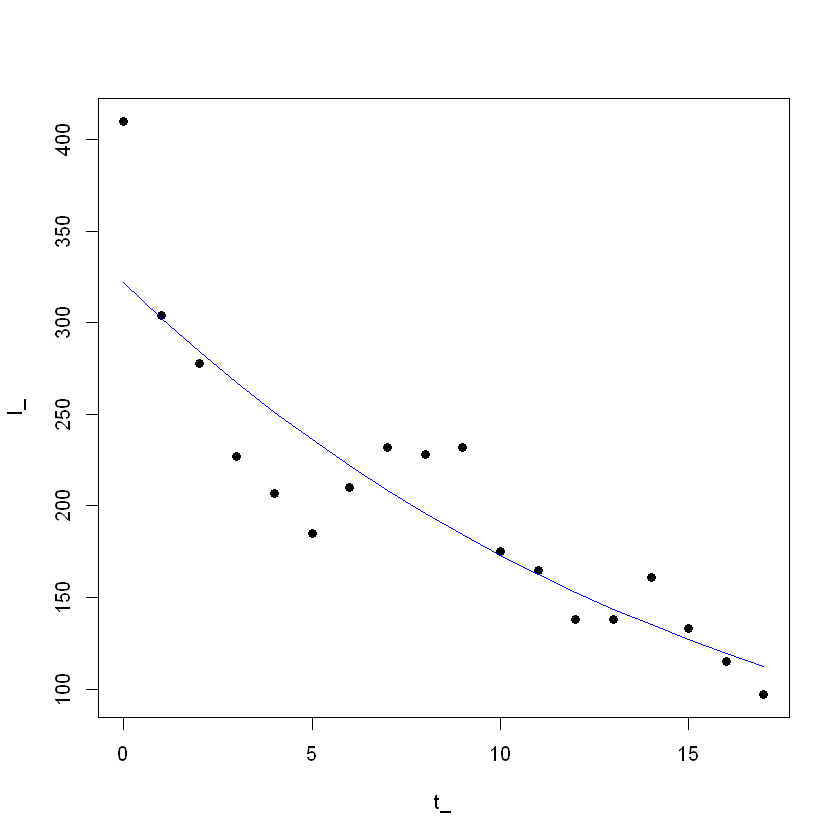

In [22]:
I_1 = 321.81661488; beta_1 = -0.06198531
print(c(I_1, beta_1))

plot(t_, I_, pch=19)
lines(t_, g(t_), col="blue")

### 8. Estimación de $\kappa_1$ y $R_1$

In [24]:
# Estimación de kappa_ y R_0_
kappa_1 = (beta_1 + mu) / S_0
R_1 = beta_1 / mu + 1

print(c(kappa_1, R_1))

[1] 2.468628e-09 8.140441e-01
